<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [49]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt
import random

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [50]:
image = np.array(Image.open('./Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





(100, 100, 3)
(100, 100)


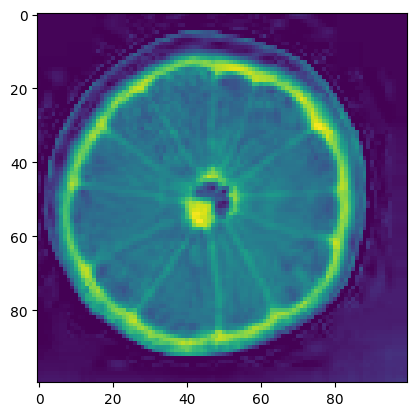

In [51]:
# Display the shape of the image
print(image.shape)

# Grab the last color channel of image
img_single_channel = image[:, :, -1]

# Display the shape of the last color channel
print(img_single_channel.shape)

# Plot the last color channel
plt.imshow(img_single_channel)
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

(100, 100)


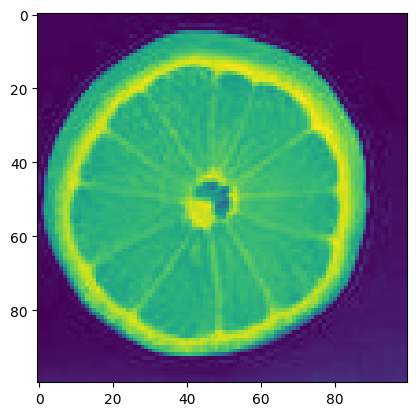

In [52]:
# Represents the average of all three color channels of image
img_average_channel = np.mean(image, axis=2)

# Display the shape of the average image channel
print(img_average_channel.shape)

# Plot the average image channel
plt.imshow(img_average_channel)
plt.show()

The image in the result of Part 1 looks more blue while the image in the result of Part 2 is more yellow, like the actual colors of a lemon. This is most likely because for the result of Part 1, we only take the last color channel, which is blue from RGB, while for the result of Part 2, we take the average of all three color channels. Thus, I believe that the image in the result of Part 2 is better because it more accurately depicts the colors of a lemon in comparison to the image in the result of Part 1.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

An identity matrix is a square matrix with a main diagonal of ones and zeros everywhere else. Multiplying any matrix with an identity matrix just results in the original matrix. In other words, the original matrix that is multiplied with the identity matrix remains unchanged.

In [53]:
# Get the number of rows and columns of the average image channel
matrix_size = img_average_channel.shape[0]

# Create an identity matrix with the size equivalent to the number of rows and columns of the average image channel
identity_matrix = np.eye(matrix_size)

# Select a random row index [0, 99]
random_row_index = random.randint(0, 99)

# Grab a random row from the identity matrix
random_row = identity_matrix[random_row_index]

# Display the random row
print(random_row)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


In every random row that is printed out, there is only one value that is 1 and all the other values are 0.

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [54]:
# Get the number of rows in the image
num_rows = image.shape[0]

# Generate a list of row indices
rows = np.arange(num_rows)

# Shuffle the row indices
np.random.shuffle(rows)

# Display the row indices
print(rows)

[30 51 21 22 84 12 34 66 95  6 14 82 75 32 17 11 86  9 85 39 27 65 20 63
 41 70 88  7 10  1 26 74 68 28 57 38 91 97 64  5 87 96 81 25 55 45  0 44
 94 50 92  3 29 49 43 36 15 73 53 56 54 77 61 48 83 62 67 42 13 78 93 40
 52 33 79 60 35 23 24 16 31  8  2 46 98 76 90 37 59 18 89 19  4 72 47 99
 58 69 71 80]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [55]:
# Shuffle the identity matrix
T = identity_matrix[rows]

# Display matrix T and its shape
print(T.shape)

(100, 100)


Matrix T is an identity matrix that has its rows shuffled with its order based on the shuffled row indices. Since the identity matrix has ones on its main diagonal, each one has a unique row and column index which makes matrix T a permutation matrix. A permutation matrix is a square matrix that has a single non-zero element for each row and column while all the other values are zero.

## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

(100, 100)


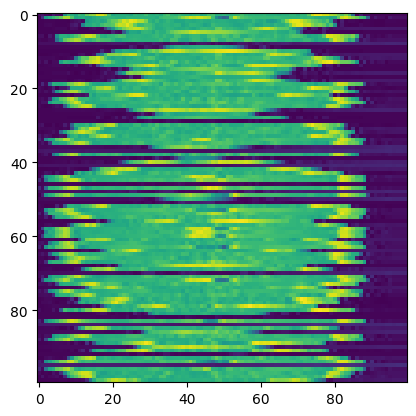

In [56]:
# Multiply matrix T and the average image channel to change the rows of the image
transformed_image = T @ img_average_channel

# Display the shape of the transformed image
print(transformed_image.shape)

# Plot the transformed image
plt.imshow(transformed_image)
plt.show()

After performing matrix multiplication, the image is no longer a lemon. It looks distorted as if each row of the image was moved to a different index.

Each dot product in the matrix multiplication is just resulting in the original row since we are multiplying by a shuffled identity matrix. The only difference is that because the identity matrix is shuffled, the rows of the transformed image are shuffled even if the colors are the same. The transformation of the original image is that the rows are shuffled while the color of the image remains unchanged.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Matrix T is invertible because a square matrix is invertible iff the determinant does not equal zero. The determinant for matrix T is -1, which is not equal to 0, so we know that it is invertible.

-1.0


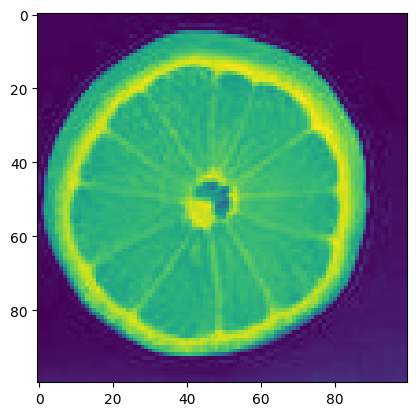

In [57]:
# Get the determinant of matrix T
Tdet = np.linalg.det(T)

# Display the determinant of matrix T
print(Tdet)

# Get the inverse of matrix T
Tinv = np.linalg.inv(T)

# Invert the transformed image into the original using matrix multiplication
original_image = Tinv @ transformed_image

# Display the original image
plt.imshow(original_image)
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


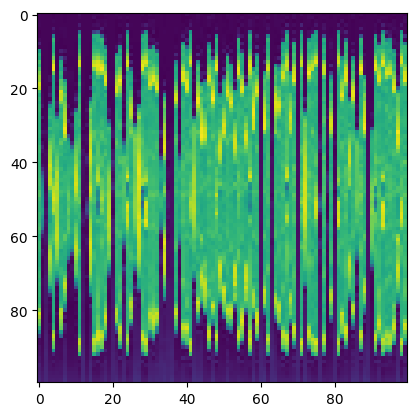

In [58]:
# Get the number of columns in the image
num_cols = image.shape[1]

# Generate a list of column indices
cols = np.arange(num_cols)

# Shuffle the list of column indices
np.random.shuffle(cols)

# Shuffle the identity matrix by column
T_col = identity_matrix[cols]

# Multiply the average image channel and matrix T_col to change the columns of the image
transformed_image = img_average_channel @ T_col

# Display the transformed image
plt.imshow(transformed_image)
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

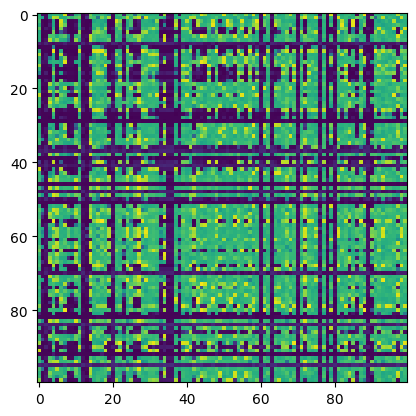

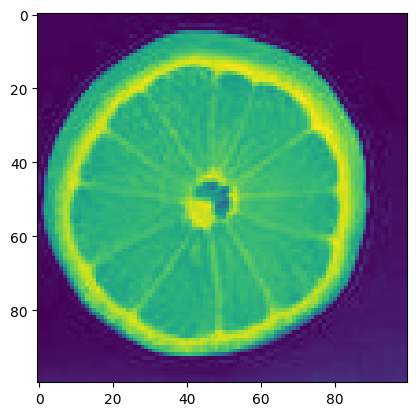

In [59]:
# Multiply matrix T and the average image channel and matrix T_col to change the rows and columns of the image
scrambled_image = (T @ img_average_channel) @ T_col

# Display the scrambled image
plt.imshow(scrambled_image)
plt.show()

# Get the inverse of matrix T_col
Tinv_col = np.linalg.inv(T_col)

# Unscramble the columns of the transformed image into the original using matrix multiplication
unscrambled_image = scrambled_image @ Tinv_col

# Unscramble the rows of the transformed image into the original using matrix multiplication
unscrambled_image = Tinv @ unscrambled_image

# Display the unscrambled image
plt.imshow(unscrambled_image)
plt.show()